# My wonderful paper

H. Sherry Zhang (University of Texas at Austin)  
Roger D. Peng (University of Texas at Austin)

This is the abstract

In [ ]:
knitr::opts_chunk$set(echo = FALSE)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'MASS'

The following object is masked from 'package:patchwork':

    area

The following object is masked from 'package:dplyr':

    select


Attaching package: 'ggh4x'

The following object is masked from 'package:ggplot2':

    guide_axis_logticks

Rows: 3288 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): season
dbl  (4): mortality, pm10, temp, dewpt
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

# Introduction

\[background\]

In this paper, a concept called analysis plan is proposed to describe the logical structure of a data analysis. An analysis plan is a set of analysis steps plus their expected outcomes. It is a formal representation of the analysis process and can be used to guide the analysis process, to communicate and compare the analysis process to others, and to evaluate the analysis process. The concept of analysis plan is illustrated with examples. The implications of the concept for data analysis practice is discussed.

The analysis plan described in this paper should be differentiated from the pre-specifies analysis plan document often used in biostatistics to specifies the hypothesis, data collection mechanism, statistical procedures etc of randomized experiments.

The rest of the paper is organized as follows: @sec-plan describes the concept of analysis plan in detail. @sec-examples provides examples of analysis plan \[more details\]. (need another section here or before examples?) @sec-conclusion concludes the paper.

# Analysis plan

-   describe/ define what analysis plan is, expectation (outcome and plan)

-   why it is useful to be explicit about expectation?

    -   expectations can be used to formulate unit tests, which helps to divide the “result universe”

# Examples

Three examples are presented to illustrate how the concept of analysis plan can be applied to data analysis. \[toy example\]. @sec-linear-reg illustrates how constructing the result universe in a linear regression model of PM10 on mortality can help understand the impact of sample size, model specification, and variable correlation structure on data analysis. \[example three\]

## A toy example

Let’s think about a 5-day step count. You make a resolution to walk on average 5000 steps a day (your expectation) and using an app to record your step count. After 5 days, the app tells you’ve walked on average 8000 steps.

It is easy to come up with reasons why an 8000 average step is resulted based on common sense:

1.  you may run a 10k on day 1, resulting a high step count on the day (outlier on the right).
2.  you left your phone at home on day 3, resulting a zero or minimal step count on the day (outlier on the left).
3.  you may realise the step count may increase since you were in a hiking trip in the last five days (average shift).

Based on these reasons, you may devise a set of unit tests to check the step count data, i.e. check the maximum and minimum step count, check the difference between each day.

-   If the daily count looks like c(4000, 5000, 5500, 5500, 20000), the maximum check will flag the data for investigate the maximum. The difference between days test will also flag the data
-   If the daily count looks like c(20000, 20000, 20000, 20000, 20000), the maximum check will flag the data for investigate the maximum.

Some part of the space is impossible: c(0, 4000, 5000, 5500, 5500) is flagged by the minimal tests but won’t cause an average of 8000 average step.

The statistical procedure of averaging 5 numbers “around 5000” to get a mean of 5000 is *consistent* meaning if all the numbers are around 5000, we are guaranteed to get a mean around 5000. We could devise 5 unit tests to check each number. Since you’re more familiar with your daily life, you may realise the step count may increase since you were in a hiking trip in the last two days. This may prompt you to check the step count.

In a data analysis, it is not practical to check every entry of the data, a similar strategy of devising tests to check for

-   The combination of unit tests are not unique
-   The unit tests provide guidance for diagnosing the results, but are not red flags: c(2000, 2000, 5000, 8000, 8000) will likely to fail the max diff test but receive a within expectation mean.

## Linear regression

Consider a linear regression model to study the effect of PM10 on mortality (provide context of using PM10 to study mortality). Analysts may expect a significant (p-value $\le$ 0.05) PM10 coefficient in the linear model from the literature. This is the *outcome expectation*. There are multiple factors that can affect the outcome expectation of linear regression, which here is called *plan expectation*, for example, 1) sample size, 2) model specification, and 3) correlation structure between variables. Adequate sample size is required to achieve the desired power to detect the significance of PM10 on mortality. Temperature is often an important confounder to consider in such study (add reference). From some domain knowledge, an analyst may expect that the significance of PM10 coefficient can be attained by adding temperature to the model. Analysts may also expect certain correlation structure between PM10, temperature, and mortality, and the distribution of each variable.

To build the result universe, datasets can be simulated to either meet and fail these plan expectations, allowing the analysts to observe the significance of PM10 coefficient. Here, sample sizes of 50, 100, 500, and 1000 are considered. Two model specifications are included: 1) linear model with PM10 as the only covariate ($\text{mortality} \sim \text{PM10}$), 2) linear model with PM10 and temperature as covariates ($\text{mortality} \sim \text{PM10} + \text{temp}$). A grid-based approach is used to simulate correlation structure. Reasonable ranges of correlation between the three variables are $\text{cor}(\text{mortality}, \text{PM10}) \in [-0.01, 0]$, $\text{cor}(\text{mortality}, \text{temperature}) \in [-0.6, -0.2]$, and $\text{cor}(\text{PM10}, \text{temperature}) \in [0.2, 0.6]$.

-   add a paragraph to describe the simulation process

-   add a fourth panel to describe the comparison of a right/ wrong expectation, i.e. correlation on PM10 and mortality

@fig-result-universe shows that result universe of the linear regression model and how a change of decision in one of the plan expectations above affect the outcome expectation. Panel a) is colored by the outcome expectation – whether a significant p-value is found in the PM10 coefficient. Panel b) shows the effect of adding temperature to the model and the results show that the significance of PM10 coefficient can be achieved by adding temperature to the model for a sample size of 500. Panel c) shows that increasing sample size from 50 to 100 enhances the significance of p-value for PM10 and the significance remains with further increases in sample size. \[note: weave the “actual data” into the example linear regression model\]

(these two paragraphs may go to a new section *discussion*) A result universe constructed in this example can be presented to analysts to answer the what-if questions raised in the data analysis. What if the sample size is increased? What if temperature is added to the model? What would the results expect to be changed when the correlation structure is different? For analysts, expectations can be used as unit tests to divide the result universe, which allows them to understand the impact of each factor on the outcome expectation.

The result universe also provides a holistic view of how the results obtained by the analysts are situated in all possible results. This can be seen as a direct towards trustworthy data analysis, where the audience of the analysis to exercise their own cognitive model \[@grolemund_cognitive_2014\] to evaluate the results reported.

In [ ]:
# Generate correlation matrices 
corr_grid <- expand.grid(seq(-0.01, -0.001, by = 0.001), 
                         seq(-0.6, -0.2, 0.05), seq(0.2, 0.6, 0.05))

# Function to compute correlation matrix for each combination 
gen_corr_mtx <- function(r1, r2, r3) {   
  cor_matrix <- matrix(c(1, r1, r2,                          
                         r1, 1, r3,                          
                         r2, r3, 1), nrow = 3, byrow = TRUE)          
  # Store the matrix in the list   
  if (all(eigen(cor_matrix)$values > 0)) return(cor_matrix) 
  }  

# Plan for parallel processing
corr_mtx <- lapply(1:nrow(corr_grid), function(i) {   
  gen_corr_mtx(corr_grid[i, 1], corr_grid[i, 2], corr_grid[i, 3]) 
  }) 
corr_mtx <- corr_mtx[map_lgl(corr_mtx, ~!is.null(.x))]  
sample_size <- c(50, 100, 500, 1000) 
model <- c("mortality ~ pm10 + temp", "mortality ~ pm10") |> map(as.formula) 

generate_data <- function(n, mtx, seed = 123) {   
  mu <- c(0, 0, 0)   
  data <- mvrnorm(n, mu, mtx, empirical = TRUE)   
  U <- pnorm(data, mean = 0, sd = 1)   
  set.seed(seed)      
  tibble(mortality = qpois(U[,1], 182), # assume distribution
         pm10 = qgamma(U[,2], shape = 6, rate = 0.2),           
         temp = qnorm(U[,3], mean = 55, sd = 16))   
  }  

# test for dist fit
# fitdist(pm10$pm10, "gamma") -> pm10_fit
# plot(pm10_fit) # gamma is better than normal for the fit of pm10
#fitdist(pm10$temp, "norm") -> temp_fit
# plot(temp_fit)

res <- tibble(corr_mtx = corr_mtx) |> 
  mutate(id = row_number()) |> 
  crossing(sample_size, model) |> 
  rowwise() |>   
  mutate(data = list(generate_data(n = sample_size, mtx = corr_mtx)),          
         fit = list(summary(lm(model, data))$coefficients))  

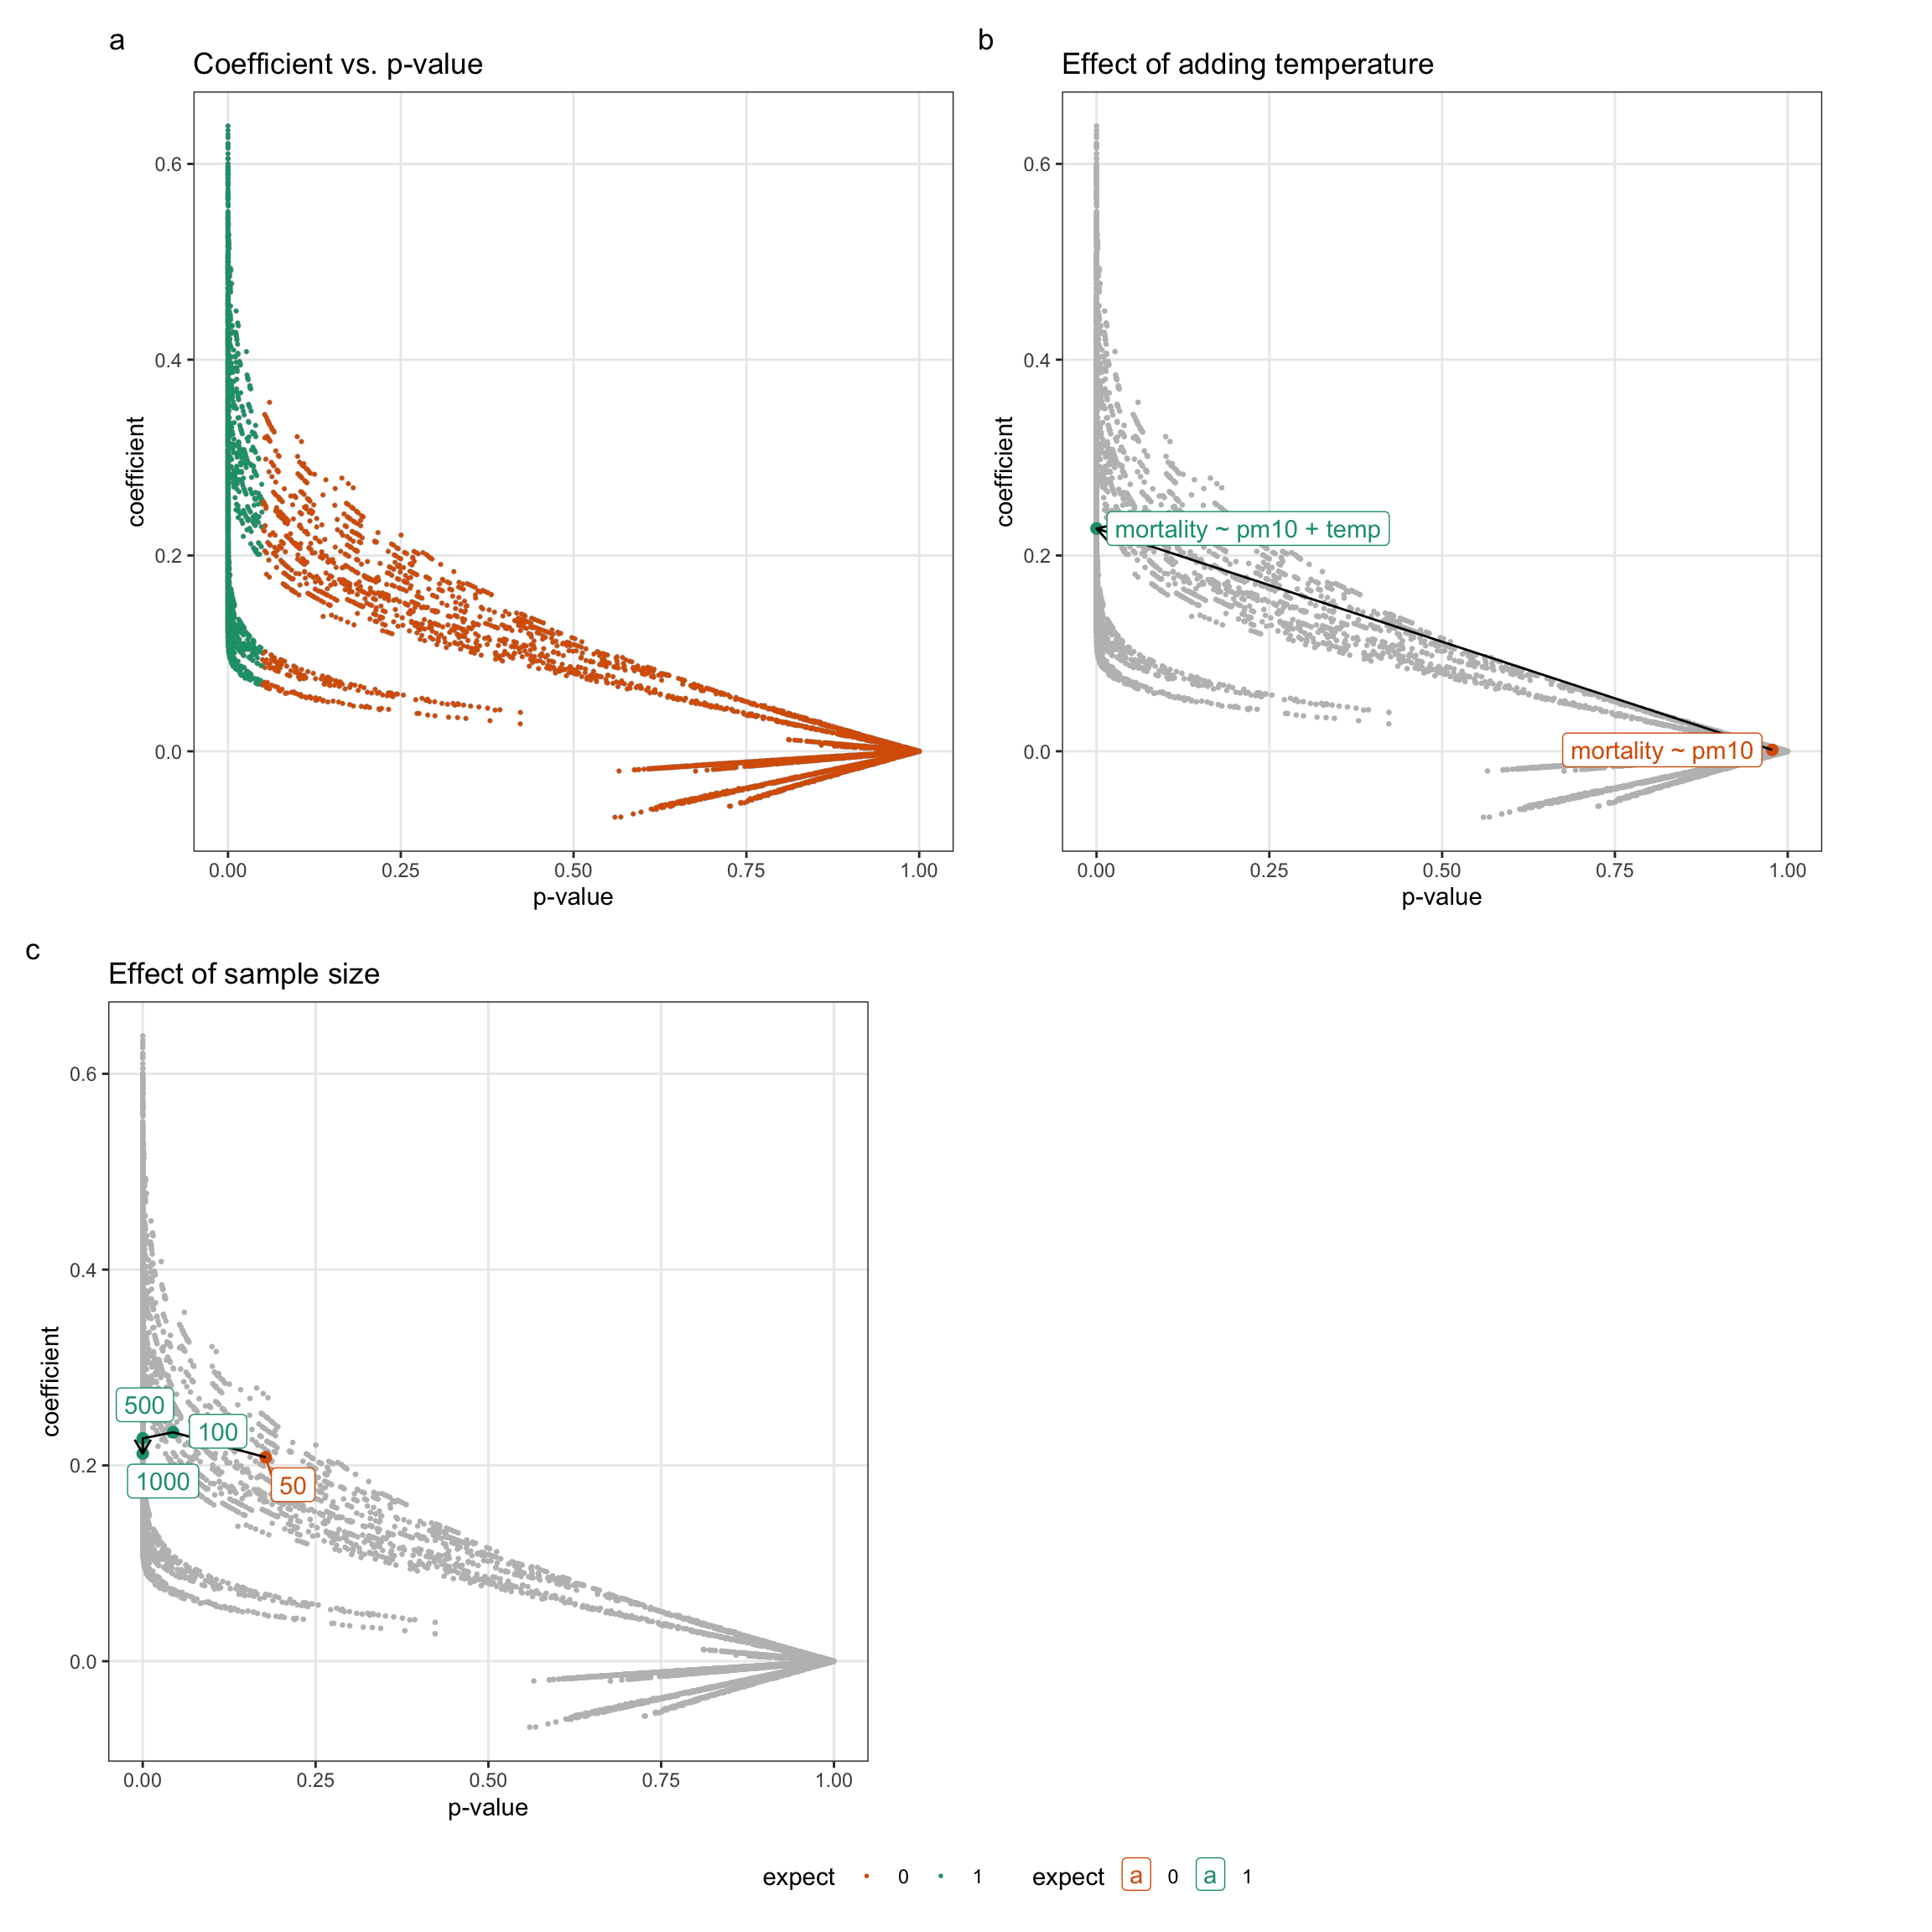

In [ ]:
dt <- res |>   
  mutate(     
    p_value = fit[2,4],     
    coef = fit[2,1],     
    xy_correlation = as.numeric(corr_mtx[1, 2]),     
    xz_correlation = as.numeric(corr_mtx[1, 3]),     
    yz_correlation = as.numeric(corr_mtx[2, 3]),     
    fml = deparse(model) |> as.factor(),     
    expect = ifelse(p_value < 0.05, 1, 0) |> as.factor(),     
    ) |>    
  ungroup() 

code_tbl <- crossing(V1 = c("signifpm10", NA),           
                     V2 = c("smallsample", NA), 
                     V3 = c("withtemp", NA)) |>      
  mutate(col1 = paste0(V1,"_", V2, "_", V3))   

lookup_tbl <- tibble(   
  value = crossing(x = c(1, 0), y = c(1, 0), z = c(1, 0)) |>      
    mutate(col = paste0(x,"_", y, "_", z)) |> 
    arrange(-x, -y, -z) |>      
    pull(col),   
  plan1 = unique(code_tbl$col1) )  

dt2 <- dt |>    
  mutate(T1 = ifelse(sample_size < 200, 1, 0),          
         T2 = ifelse(fml == "mortality ~ pm10 + temp", 1, 0),          
         pp1 = paste0(expect, "_", T1, "_", T2),) |>    
  left_join(lookup_tbl, by = c("pp1" = "value"))      

p0 <- dt |> ggplot() +   
  geom_point(aes(x = p_value , y = coef), color = "grey", size = 0.5) +  
  labs(x = "p-value", y = "coefficient") +   
  theme_bw() +    
  theme(aspect.ratio = 1, 
        panel.grid.minor = element_blank()) 

df0 <-  dt |> filter(sample_size == 500, xy_correlation == -0.005, 
                     between(xz_correlation, -0.46, -0.43),
                     yz_correlation == 0.4) |> arrange(expect)
df2 <- df0 |> filter(fml == "mortality ~ pm10 + temp") # test for model spec

p1 <- p0 + 
  geom_point(aes(x = p_value , y = coef, color = expect), size = 0.3) +  
  scale_color_brewer(palette = "Dark2", direction = -1) +
  labs(title = "Coefficient vs. p-value") + 
  theme(legend.position = 'none')

p2 <- p0 + 
  geom_point(data = df0, aes(x = p_value, y = coef, color = expect), size = 2) +
  geom_path(data = df0, aes(x = p_value, y = coef), color = "black",
            arrow = arrow(type = "open", angle = 30, 
                          length = unit(0.1, "inches"))) +
  ggrepel::geom_label_repel(
    data = df0, aes(x = p_value, y = coef, label = fml, color = expect)
    ) +
  scale_color_brewer(palette = "Dark2", direction = -1) +
  labs(title = "Effect of adding temperature") 

df00 <-  dt |> filter(xy_correlation == -0.005, 
                     between(xz_correlation, -0.46, -0.43),
                     yz_correlation == 0.4) |> arrange(expect)
df <- df00 |> filter((fml == "mortality ~ pm10 + temp"))


p3 <- p0 + 
  geom_point(data = df, aes(x = p_value, y = coef, color = expect), size = 2) +
  geom_path(data = df, aes(x = p_value, y = coef), color = "black",
            arrow = arrow(type = "open", angle = 30, 
                          length = unit(0.1, "inches"))) +
  ggrepel::geom_label_repel(
    data = df, aes(x = p_value, y = coef, label = sample_size, color = expect)
    ) +
  scale_color_brewer(palette = "Dark2", direction = -1) +
  labs(title = "Effect of sample size") 

(p1 | p2) / (p3 | plot_spacer()) + 
  plot_annotation(tag_levels = "a") + 
  plot_layout(guides = 'collect') &
  theme(legend.position = 'bottom') 

# Conclusion

# References